> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# In this dataset we will main answer this two question

## Q1. Which genres are most popular from year to year?(year>=1980)

## Q2. What kinds of properties are associated with movies that have high revenues?

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd # pandas for dealing with dataframe
import numpy as np # To do numeric calculation
import seaborn as sns # more interactive plots
import matplotlib.pyplot as plt # plot
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Data Exploration

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df1 = pd.read_csv("tmdb_5000_movies.csv") 
'''Importing data using pandas read_csv.data is downloaded from https://www.kaggle.com/tmdb/tmdb-movie-metadata.''' 

'Importing data using pandas read_csv.data is downloaded from https://www.kaggle.com/tmdb/tmdb-movie-metadata.'

In [3]:
df1.dtypes # exploring dtypes of Data Frame

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [4]:
df1.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [5]:
df1.columns[df1.isnull().any()] # columns with nan values

Index(['homepage', 'overview', 'release_date', 'runtime', 'tagline'], dtype='object')

In [6]:
df1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
df1.shape # Shape of dataframe

(4803, 20)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning process

In [8]:
df1['release_date'] = pd.to_datetime(df1['release_date']).apply(lambda x: x.date()) # changing dtypes to datetime
df1['title_year'] = pd.to_datetime(df1['release_date']).apply(lambda x: x.year) # taking year for release date
df1['title_year']=df1['title_year'].values.astype(int) # changing dtype to int

Changing dtype of release date and create title year column 

In [9]:
data=df1.copy() # creating copy 

sub-dividing genre column to genres_no and genres_name

In [10]:
# creating genres_no from genres[i][8:10]
genres_list = []
for i in range(0,4802):
    if df1.genres[i][8:10] == '10':
        first_type_of_film = df1.genres[i][8:13] 
    elif df1.genres[i][8:10] == '87':
        first_type_of_film = df1.genres[i][8:11]
    else:
        first_type_of_film = df1.genres[i][8:10]
    genres_list.append(first_type_of_film)
df=pd.DataFrame(genres_list)
data['genres_no'] = df
data['genres_no'].replace('','13',inplace=True)
data['genres_no'].dropna(inplace=True)
data['genres_no'].unique()

array(['28', '12', '14', '16', '878', '18', '53', '10751', '35', '36',
       '10752', '37', '10749', '80', '96', '27', '99', '10402', '10770',
       '13', '10769'], dtype=object)

In [11]:
# Creating genres_name from genres[i][22:2X]
genres_name = []
for i in range(0,4802):
    if len(data['genres_no'][i]) == 3:
        type_name_of_film = data.genres[i][22:26]
    elif len(data['genres_no'][i]) == 5:
        type_name_of_film = data.genres[i][24:27]
    else:
        type_name_of_film = data.genres[i][21:24]
    genres_name.append(type_name_of_film)
df2=pd.DataFrame(genres_name)
data['genres_name'] = df2
data['genres_name'].replace('','others',inplace=True)
data['genres_name'].dropna(inplace=True)
data['genres_name'].value_counts()

Dra       1207
Com       1042
Act        754
Adv        339
Hor        300
Cri        195
Thr        194
Ani        123
Fan        117
Rom        106
Scie        96
Doc         88
Fam         56
 "M         41
Mus         34
others      28
Wes         27
His         25
War         24
TV           4
For          2
Name: genres_name, dtype: int64

sub-dividing production_countries_name with just name and spoken language

In [12]:
# Creating production_countries_name from production_countries since its in Hierarchical form
production_countries_list = []
for i in range(0,4802):
    production_countries_name = df1.production_countries[i][17:19]
    production_countries_list.append(production_countries_name)
df2=pd.DataFrame(production_countries_list)
data['production_countries_name'] = df2
data['production_countries_name'].replace('','others',inplace=True)
data['production_countries_name'].dropna(inplace=True)
data['production_countries_name'].unique()

array(['US', 'GB', 'JM', 'CZ', 'NZ', 'CN', 'CA', 'DE', 'JP', 'FR', 'AU',
       'IT', 'ES', 'IN', 'BE', 'others', 'HK', 'NO', 'IE', 'ZA', 'MX',
       'MY', 'FI', 'IS', 'DK', 'PH', 'RU', 'BG', 'CH', 'AE', 'MT', 'KR',
       'BR', 'PE', 'NL', 'BA', 'LU', 'RO', 'SG', 'AW', 'LY', 'HU', 'AR',
       'PA', 'AT', 'GR', 'SE', 'TH', 'FJ', 'BS', 'TR', 'CY', 'BO', 'MA',
       'EC', 'PL', 'IL', 'BT', 'LB', 'KG', 'DZ', 'ID', 'GY', 'PK', 'GP',
       'IR', 'SI', 'AF', 'DO', 'CM', 'KE'], dtype=object)

In [13]:
# Creating spoken_languages_str through spoken_languages
spoken_languages_list = []
for i in range(0,4802):
    spoken_languages_str = df1.spoken_languages[i][16:18]
    spoken_languages_list.append(spoken_languages_str)
df3=pd.DataFrame(spoken_languages_list)
data['spoken_languages_str'] = df3
data['spoken_languages_str'].dropna(inplace=True)
data['spoken_languages_str'].replace('','others',inplace=True)
data['spoken_languages_str'].unique()

array(['en', 'fr', 'is', 'ro', 'la', 'it', 'de', 'es', 'pt', 'zh', 'gd',
       'ar', 'af', 'cn', 'da', 'ru', 'sw', 'others', 'bg', 'el', 'cs',
       'ja', 'bo', 'eo', 'he', 'uk', 'sv', 'co', 'et', 'hi', 'ko', 'th',
       'ml', 'vi', 'km', 'hu', 'kw', 'hr', 'nl', 'ta', 'hy', 'sq', 'xx',
       'gl', 'bs', 'no', 'bn', 'ga', 'pl', 'sr', 'yi', 'dz', 'sh', 'ky',
       'id', 'ur', 'fa'], dtype=object)

In [14]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,title_year,genres_no,genres_name,production_countries_name,spoken_languages_str
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,28,Act,US,en
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,12,Adv,US,en
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,2015,28,Act,GB,fr
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,28,Act,US,en
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012,28,Act,US,en


creating porfit, runtime rate, vote average rate and profit rate column 

In [15]:
# profit = revenue - budget creating profit column
data['profit']=data['revenue']-data['budget']

In [16]:
# dropping all nan value of runtime from dataframe
data['runtime'].dropna(inplace=True)

In [17]:
# Creating rate by dividing value with max value
data['runtime_rate']=data['runtime']/data['runtime'].max()
data['vote_average_rate']=data['vote_average']/data['vote_average'].max()

In [18]:
# Creating profit_rate with profit and budget 
data['profit_rate']=data['profit']/data['budget']
data['profit_rate'].dropna(inplace=True)
data['profit_rate'].replace('',0.1,inplace=True) # replacing "" with 0.1

In [19]:
# Exploring vote_average 
data['vote_average'].describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

In [20]:
# Creating a categorical variable with vote_average
rate_category_list=[]
for each in data['vote_average']:
    if each<1:
        rate_of_category = "Ridiculous"
    elif each>=1 and each<2:
        rate_of_category = "Awful"
    elif each>=2 and each<3:
        rate_of_category = "Bad"
    elif each>=3 and each<4:
        rate_of_category = "Might"
    elif each>=4 and each<5:
        rate_of_category = "Average"
    elif each>=5 and each<6:
        rate_of_category = "Good"
    elif each>=6 and each<7:
        rate_of_category = "Good+"
    elif each>=7 and each<8:
        rate_of_category = "Very Good"
    elif each>=8 and each<9:
        rate_of_category = "Excellent"
    else:
        rate_of_category = "Amazing"
    rate_category_list.append(rate_of_category)
category_df=pd.DataFrame(rate_category_list)
data['category_of_rate'] = category_df
data['category_of_rate'].unique()

array(['Very Good', 'Good+', 'Good', 'Excellent', 'Average', 'Might',
       'Bad', 'Ridiculous', 'Awful', 'Amazing'], dtype=object)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 30 columns):
budget                       4803 non-null int64
genres                       4803 non-null object
homepage                     1712 non-null object
id                           4803 non-null int64
keywords                     4803 non-null object
original_language            4803 non-null object
original_title               4803 non-null object
overview                     4800 non-null object
popularity                   4803 non-null float64
production_companies         4803 non-null object
production_countries         4803 non-null object
release_date                 4802 non-null object
revenue                      4803 non-null int64
runtime                      4801 non-null float64
spoken_languages             4803 non-null object
status                       4803 non-null object
tagline                      3959 non-null object
title                        4803 non-null o

dropping genres, homepage, production_companies, release_date, production_countries, spoken_languages, keywords because some contains alots of missing value and some have all ready been sub-divide

In [22]:
# dropping non-useful features
data.drop(['genres','homepage','production_companies','release_date','production_countries','spoken_languages','keywords'], axis=1)

,budget,id,original_language,original_title,overview,popularity,revenue,runtime,status,tagline,...,title_year,genres_no,genres_name,production_countries_name,spoken_languages_str,profit,runtime_rate,vote_average_rate,profit_rate,category_of_rate
0,237000000,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,Released,Enter the World of Pandora.,...,2009,28,Act,US,en,2550965087,0.479290,0.72,10.763566,Very Good
1,300000000,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,Released,"At the end of the world, the adventure begins.",...,2007,12,Adv,US,en,661000000,0.500000,0.69,2.203333,Good+
2,245000000,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,880674609,148.0,Released,A Plan No One Escapes,...,2015,28,Act,GB,fr,635674609,0.437870,0.63,2.594590,Good+
3,250000000,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,1084939099,165.0,Released,The Legend Ends,...,2012,28,Act,US,en,834939099,0.488166,0.76,3.339756,Very Good
4,260000000,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,284139100,132.0,Released,"Lost in our world, found in another.",...,2012,28,Act,US,en,24139100,0.390533,0.61,0.092843,Good+
5,258000000,559,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,890871626,139.0,Released,The battle within.,...,2007,14,Fan,US,en,632871626,0.411243,0.59,2.452991,Good
6,260000000,38757,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,591794936,100.0,Released,They're taking adventure to new lengths.,...,2010,16,Ani,US,en,331794936,0.295858,0.74,1.276134,Very Good
7,280000000,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,1405403694,141.0,Released,A New Age Has Come.,...,2015,28,Act,US,en,1125403694,0.417160,0.73,4.019299,Very Good
8,250000000,767,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,933959197,153.0,Released,Dark Secrets Revealed,...,2009,12,Adv,GB,en,683959197,0.452663,0.74,2.735837,Very Good
9,250000000,209112,en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,873260194,151.0,Released,Justice or revenge,...,2016,28,Act,US,en,623260194,0.446746,0.57,2.493041,Good


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which genres are most popular from year to year?(year>=1980))

See correlation matrix along the features

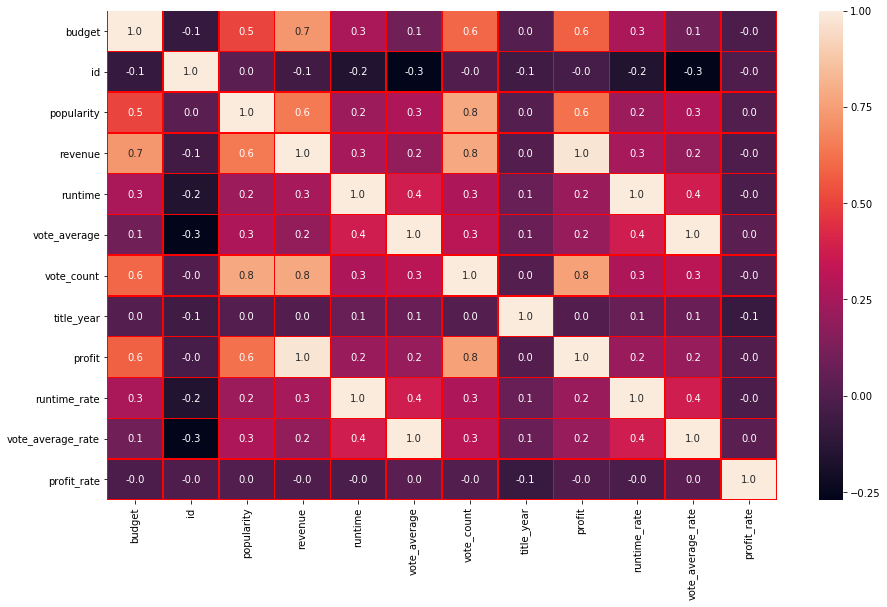

In [23]:
# ploting correlation matrix
f,ax = plt.subplots(figsize=(15, 9))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [24]:
# Creating a df from title_year, popularity and genres_name for answering first question 
df2= data[['title_year','popularity','genres_name']][data['title_year']>=1980]
df2.head()

,title_year,popularity,genres_name
0,2009,150.437577,Act
1,2007,139.082615,Adv
2,2015,107.376788,Act
3,2012,112.312950,Act
4,2012,43.926995,Act


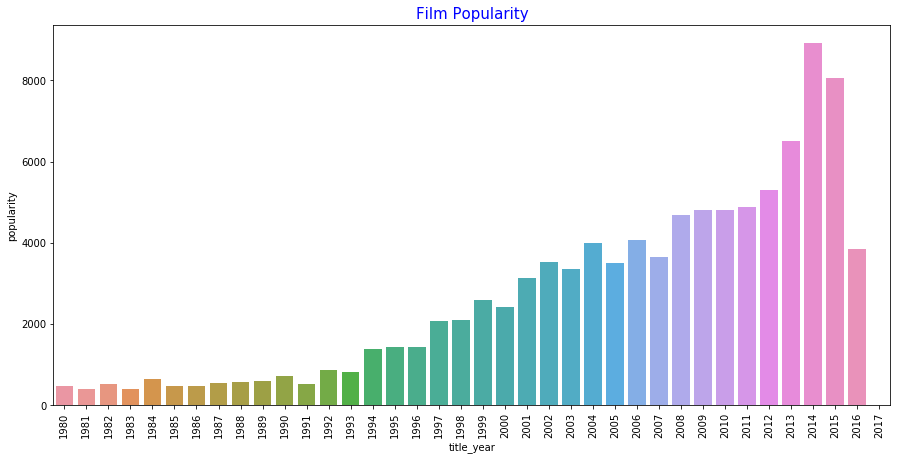

In [25]:
# Ploting how films have become popular from 1980 to 2017
d=df2.groupby('title_year').popularity.sum()
df3 = pd.DataFrame(d)
plt.figure(figsize=(15,7))
sns.barplot(data=df3,x=df3.index, y='popularity')
plt.xticks(rotation=90)
plt.title("Film Popularity",color = 'blue',fontsize=15)
plt.show()

movies popularity across year 1980 - 2017

In [26]:
# ploting which genres are most popular from year to year
d=df2.groupby('title_year').popularity.max()
df4 = pd.DataFrame(d)
genres = df2[df2.popularity.isin(df4.popularity)]
genres = genres.sort_values(by=['title_year'])
genres.reset_index(inplace = True, drop=True)

In [27]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
genres

,title_year,popularity,genres_name
0,1980,78.699993,Hor
1,1981,68.159596,Adv
2,1982,94.056131,Scie
3,1983,70.105981,Act
4,1984,74.234793,Act
5,1985,76.603233,Adv
6,1986,67.660940,Hor
7,1987,50.009408,Scie
8,1988,66.169628,Act
9,1989,80.972475,Adv


In [28]:
genres['genres_name'].value_counts()

Adv     12
Act     10
Dra      4
Scie     3
Hor      2
Ani      2
Com      2
Thr      1
Cri      1
Fam      1
Name: genres_name, dtype: int64

Year wise most popular movie's genres

### Explain
We have gathered only the features title_year, popularity and genres_name which are responisible to answer the first question. Here we have gathered the most popularity movies of each year and then found the genre of this movies.
Year is been considered from 1980 to 2017. And we have also tried to show the popularity of movies from 1980 to 2017.

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?!)

In [29]:
# Creating a years_financial df form budget, revenue and profit
years_financial = data[['budget','revenue','profit']].groupby(data['title_year'][data['title_year']>=1980])
financial_df2=pd.DataFrame(years_financial.sum())
sorted_profit2=financial_df2.sort_values('profit',ascending=False)
sorted_profit2.head()

,budget,revenue,profit
title_year,,,
2012.0,7263782654,24141710246,16877927592
2014.0,7368453311,24120490589,16752037278
2015.0,6724547367,22775024221,16050476854
2013.0,8205880834,23411493295,15205612461
2009.0,7644466762,21072651506,13428184744


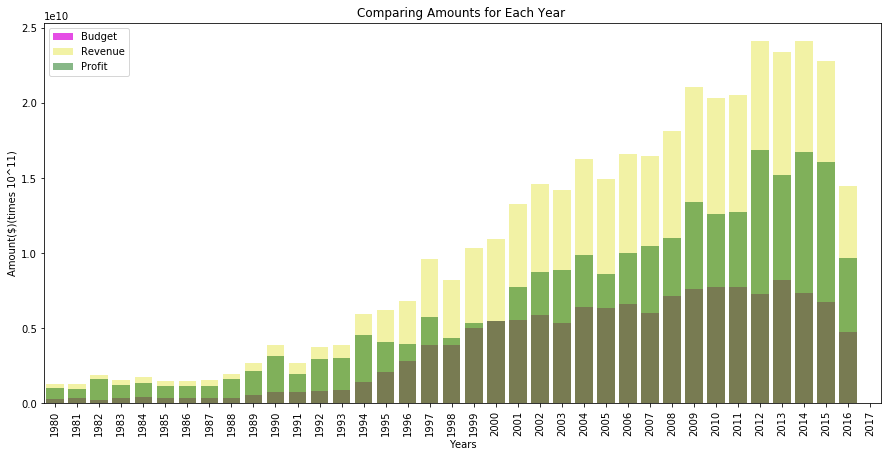

In [30]:
# Ploting year wise comparison of budget,revenue and profit from 1980
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x=sorted_profit2.index.astype(int), y=sorted_profit2['budget'],color='magenta',alpha = 0.8,label='Budget')
sns.barplot(x=sorted_profit2.index.astype(int), y=sorted_profit2['revenue'],color='yellow',alpha = 0.4,label='Revenue')
sns.barplot(x=sorted_profit2.index.astype(int), y=sorted_profit2['profit'],color='green',alpha = 0.5,label='Profit')
plt.xticks(rotation= 90)
ax.legend(loc='upper left',frameon = True)
ax.set(xlabel='Years', ylabel='Amount($)(times 10^11)',title = "Comparing Amounts for Each Year ")
plt.show()

top 50 most revenue movies all across year

In [48]:
# Creating df5 from most of popular features
df5 = data[['title_year','title','revenue','budget','profit','popularity','genres_name','runtime','vote_average','vote_count','category_of_rate']][data['title_year']>=1980]
df5 = df5.sort_values('revenue',ascending=False).head(50)
df5.reset_index(inplace = True, drop=True)
df5.head(10)

,title_year,title,revenue,budget,profit,popularity,genres_name,runtime,vote_average,vote_count,category_of_rate
0,2009,Avatar,2787965087,237000000,2550965087,150.437577,Act,162.0,7.2,11800,Very Good
1,1997,Titanic,1845034188,200000000,1645034188,100.025899,Dra,194.0,7.5,7562,Very Good
2,2012,The Avengers,1519557910,220000000,1299557910,144.448633,Scie,143.0,7.4,11776,Very Good
3,2015,Jurassic World,1513528810,150000000,1363528810,418.708552,Act,124.0,6.5,8662,Good+
4,2015,Furious 7,1506249360,190000000,1316249360,102.322217,Act,137.0,7.3,4176,Very Good
5,2015,Avengers: Age of Ultron,1405403694,280000000,1125403694,134.279229,Act,141.0,7.3,6767,Very Good
6,2013,Frozen,1274219009,150000000,1124219009,165.125366,Ani,102.0,7.3,5295,Very Good
7,2013,Iron Man 3,1215439994,200000000,1015439994,77.682080,Act,130.0,6.8,8806,Good+
8,2015,Minions,1156730962,74000000,1082730962,875.581305,Fam,91.0,6.4,4571,Good+
9,2016,Captain America: Civil War,1153304495,250000000,903304495,198.372395,Adv,147.0,7.1,7241,Very Good


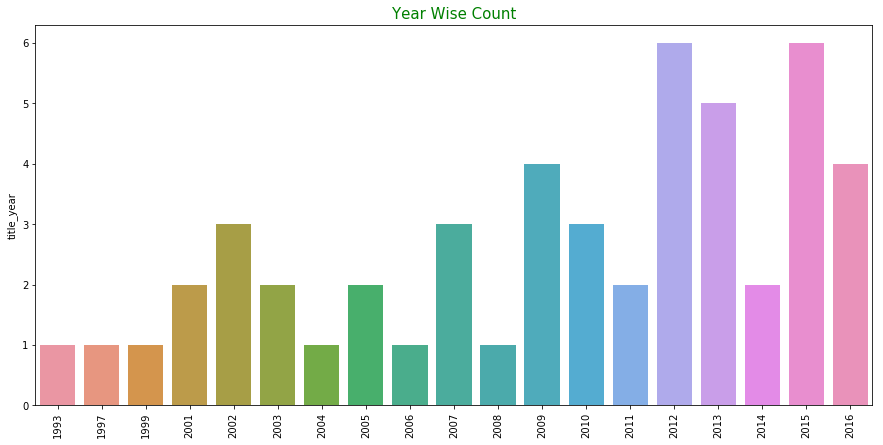

In [49]:
# Ploting year wise count of top 50 reveune movies
year=pd.DataFrame(df5['title_year'].value_counts())
plt.figure(figsize=(15,7))
sns.barplot(data=year,x=year.index, y='title_year')
plt.xticks(rotation=90)
plt.title("Year Wise Count",color = 'green',fontsize=15)
plt.show()

most revenue movies are release after 2000

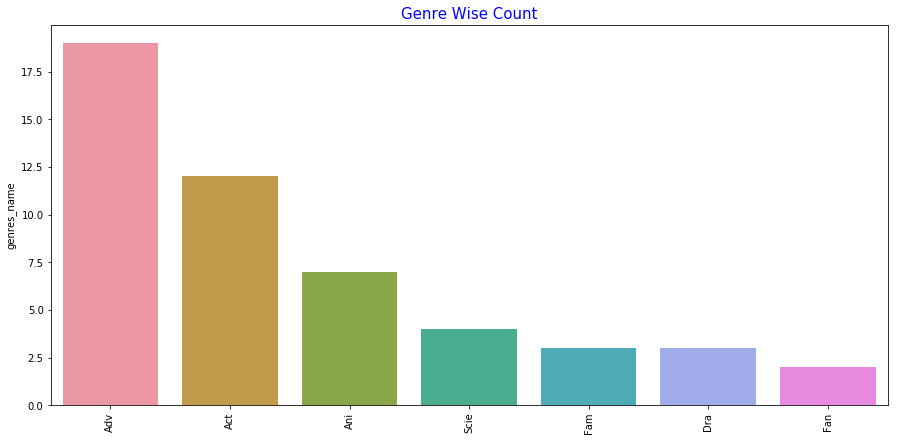

In [50]:
# Ploting genre_name wise count of top 50 reveune movies
genre=pd.DataFrame(df5['genres_name'].value_counts())
plt.figure(figsize=(15,7))
sns.barplot(data=genre,x=genre.index, y='genres_name')
plt.xticks(rotation=90)
plt.title("Genre Wise Count",color = 'blue',fontsize=15)
plt.show()

from top 50 most genre is adv followed by act and ani

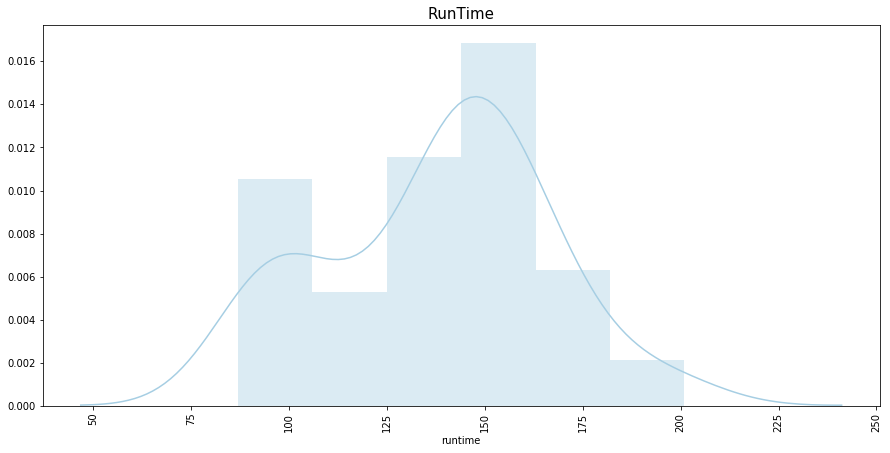

In [51]:
# Ploting Runtime of top 50 reveune movies
sns.set_palette("Paired")
plt.figure(figsize=(15,7))
sns.distplot(df5['runtime'])
plt.xticks(rotation=90)
plt.title("RunTime",fontsize=15)
plt.show()

from top 50 most movie's run time is 125-175 mins

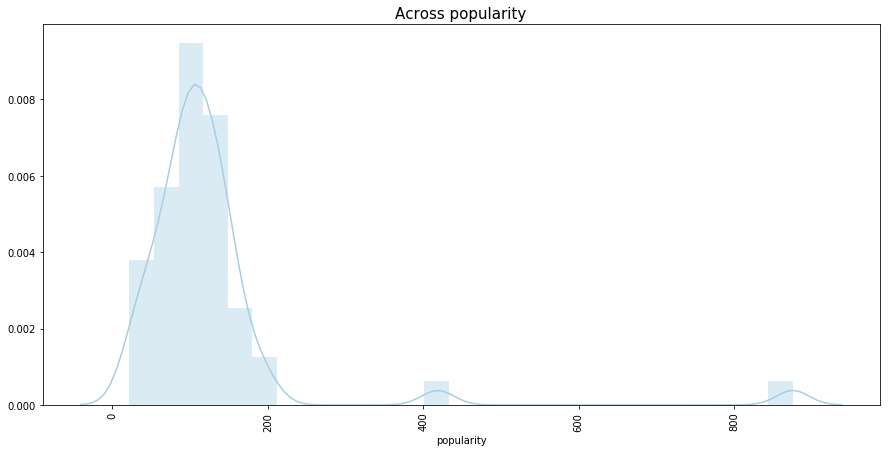

In [52]:
# Ploting popularity of top 50 reveune movies
sns.set_palette("Paired")
plt.figure(figsize=(15,7))
sns.distplot(df5['popularity'])
plt.xticks(rotation=90)
plt.title("Across popularity",fontsize=15)
plt.show()

from top 50 most movies popularity range is 125-175 however there are twi outliers which has popularity range of 400 and above 800

In [53]:
# Extracting the outlier
df5[df5.popularity>400]

,title_year,title,revenue,budget,profit,popularity,genres_name,runtime,vote_average,vote_count,category_of_rate
3,2015,Jurassic World,1513528810,150000000,1363528810,418.708552,Act,124.0,6.5,8662,Good+
8,2015,Minions,1156730962,74000000,1082730962,875.581305,Fam,91.0,6.4,4571,Good+


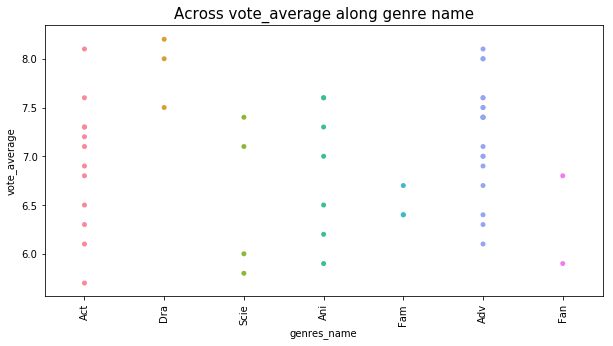

In [54]:
# ploting Across vote_average along genre name
sns.set_palette("pastel")
plt.figure(figsize=(10,5))
sns.stripplot(x="genres_name", y="vote_average", data=df5)
plt.xticks(rotation=90)
plt.title("Across vote_average along genre name",fontsize=15)
plt.show()

### Explain
We have tried to plot top 50 movies with highest revenue. And we have tried to see the features affecting revenue and tried to see the relation.<br>
*YEAR* :- as due to globalization and growth of economy and movies industry almost all the movies in top 50 are in 2000 (after 2005)<br>
*GENRE* :- Adventure, Action and animation genre which are leading top 50
*RUNTIME* :- Most of high revenue have there run btw 125 to 150 mins
*POPULARITY* :- most of top 50 have their popularity range in 125 to 150 with top outlier

Drama genre has highest vote_average though act and adv has most occurance

In [55]:
data.shape

(4803, 30)

In [56]:
data['budget'].mean()/data['revenue'].mean()

0.35308551393910798

In [57]:
data['runtime'].mean()

106.87585919600083

In [58]:
df5['runtime'].mean()

137.81999999999999

In [59]:
data['vote_count'].mean()

690.21798875702689

In [60]:
df5['vote_count'].mean()

5960.1599999999999

<a id='conclusions'></a>
## Conclusions

> **Q1**: Where we have seen from year 1980-2017 most popular movie genre is adventure followed by action and drama.And we have also seen the popularity of movies from 1980 to 2017. with 2014 at its peak.

> **Q2**: We have seen that most of top revenue movies are recently been release as its mostly due to globalization and technology advancement and etc. And also genres are most adventure, action and animation in the top revenue movies.

## challenges
> **1**: Some columns were in Hierarchical structure. It was toublesome sub-extracting value in key value pair.

> **2**: Some columns were having missing value with more 80% of its value so i have dropped these columns.

> **3**: Release date having string dtype so had to change it into datetime.

> **4**: Extract information one along the another in first question was little difficult.

## Conclusions Phase
> There are 4803 movies in the dataset which is a good sample number and these are columns which have null values in 'homepage', 'overview', 'release_date', 'runtime', 'tagline'. Looking at our short comings homepage, tagline and overview are not important in our observation so i'm going drop these.

> Average movie budget is 35% of average movie revenue.

> Although adventure movie genre aint the most produced movie though but its seen that most of movies in top 50 of reveune is adventure which is 40% of top 50.

> Average movie runtime is 107 mins which 30mins less then the average runtime of top 50 movies. Thus movies will large runtime are better for revenue.

> See that correlation matrix vote_count and popularity features are highly correlated with top 50. as we can clearly see that average of vote_count and popularity are much higher in top 50 compare



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [61]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0